In [153]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Generate sample data with outliers

In [154]:
from sklearn.datasets import make_regression

n_samples = 1000
n_outliers = 100

X, y, coef = make_regression(n_samples=n_samples, n_features=1,
                             n_informative=1, noise=10,
                             coef=True, random_state=0)

# Add outlier data
np.random.seed(0)  # always use the same random "start parameter"
X[-1*n_outliers:] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[-1*n_outliers:] = -3 + 10 * np.random.normal(size=n_outliers)

In [149]:
df = pd.DataFrame(X, columns=['feature'])
df['target'] = y
df.head()

,feature,target
0,-2.552990,-215.549295
1,1.764052,151.741965
2,-1.791328,-134.999521
3,-1.214077,-94.309655
4,-1.444940,-121.098550


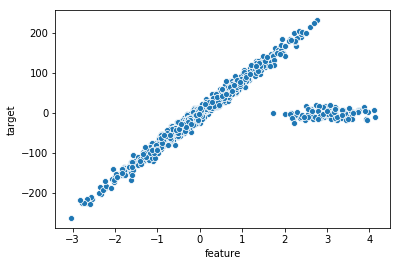

In [155]:
sns.scatterplot(data=df, x='feature', y='target'); plt.show()

# Fit a "normal" linear model

In [156]:
lr = linear_model.LinearRegression()
lr.fit(X, y)
print(lr.intercept_)
print(lr.coef_)

-14.390282214251352
[41.2235571]


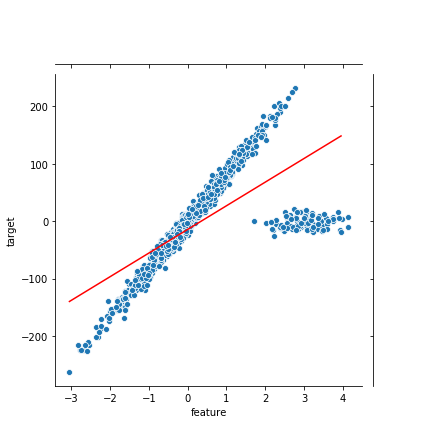

In [157]:
# visualize
g = sns.JointGrid(data=df, x='feature', y='target')
g.plot_joint(sns.scatterplot)  # draw a scatterplot

line_X = np.arange(X.min(), X.max())[:, np.newaxis]  # draw a line (x-values)
line_y = lr.predict(line_X)  # use linear model for prediction (y-values)

plt.plot(line_X, line_y, color='r', label='Linear regressor')
plt.show()

# Fit a RANdom SAmple Consensus (RANSAC) linear model

In [178]:
print(df.target.mean())
print(df.target.mad())

# residual_threshold: determines how "far" samples are classified inliers.
# By default the threshold is chosen as the MAD (median absolute deviation) of the target values y.
ransac = linear_model.RANSACRegressor(residual_threshold=None)
ransac = ransac.fit(X, y)

-3.7838905082998737
59.408486609268365


## RANSAC identifies outliers and avoids their usage in fitting

In [179]:
inlier_mask = ransac.inlier_mask_
df['outlier'] = np.logical_not(inlier_mask)
df[df.outlier].head()

,feature,target,outlier
317,1.943621,183.581917,True
900,3.882026,15.831507,True
901,3.200079,-16.477591,True
902,3.489369,-15.704850,True
903,4.120447,6.693967,True


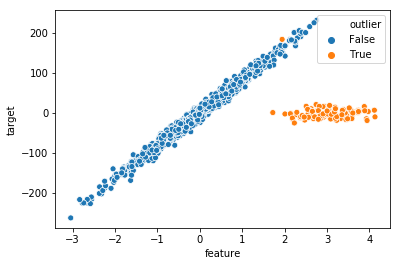

In [180]:
sns.scatterplot(data=df, x='feature', y='target', hue='outlier'); plt.show()

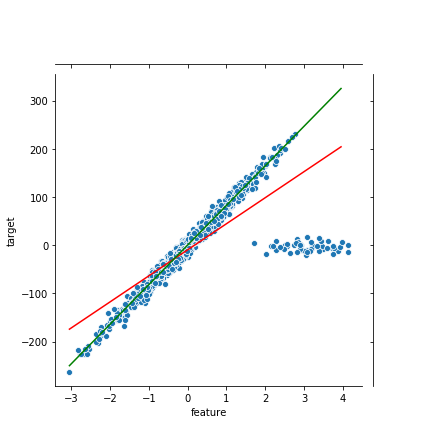

In [111]:
# visualize
g = sns.JointGrid(data=df, x='feature', y='target')
g.plot_joint(sns.scatterplot)  # draw a scatterplot

line_ransac_y = ransac.predict(line_X)  # use ransac model for prediction (y-values)

plt.plot(line_X, line_y, color='r', label='Linear regressor')
plt.plot(line_X, line_ransac_y, color='g', label='Linear regressor')
plt.show()